In [2]:
!wget https://zenodo.org/records/15613160/files/Ag20_rotate.vasp
!wget https://zenodo.org/records/15613160/files/Ag20_rho_ks.xsf
!wget https://zenodo.org/records/15613160/files/Ag20.tddft.out
# !wget https://zenodo.org/records/15613127/files/Ag20_rho_lmg.xsf


--2025-06-07 03:47:48--  https://zenodo.org/records/15613160/files/Ag20_rotate.vasp
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.43.25, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1468 (1.4K) [application/octet-stream]
Saving to: ‘Ag20_rotate.vasp’

100%[======================================>] 1,468       --.-K/s   in 0s      

2025-06-07 03:47:49 (151 MB/s) - ‘Ag20_rotate.vasp’ saved [1468/1468]

--2025-06-07 03:47:49--  https://zenodo.org/records/15613160/files/Ag20_rho_ks.xsf
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 376439697 (359M) [application/octet-stream]
Saving to: ‘Ag20_rho_ks.xsf’

100%[======================================>] 376,439,697 22.9MB/s   in 18s    

2025-06-07 03:48:07 (20.4 MB/

## Visualize structure with ASE

In [3]:
from ase.visualize import view
from ase.visualize.plot import plot_atoms
from io import BytesIO
from ase.io import read
import numpy as np
import matplotlib.pyplot as plt

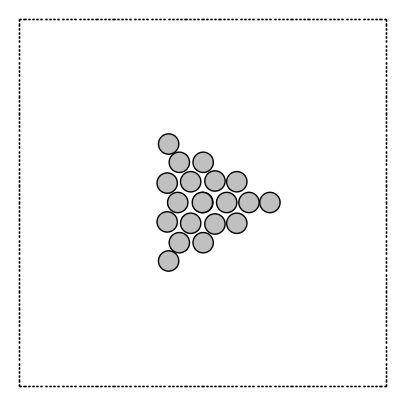

In [4]:
atoms = read('Ag20_rotate.vasp')
fig, ax = plt.subplots(figsize=(5, 5))
plot_atoms(atoms, ax, radii=0.5, rotation=('90x,90y,0z'))
plt.axis('off')
buf = BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight')
buf.seek(0)
fig.savefig('Ag20.png')

In [5]:

from dftpy.td.utils import calc_spectra_mu
import qepy
from dftpy.constants import TIME_CONV, LEN_CONV, ENERGY_CONV
as2au = TIME_CONV['s']['au']*1e-18
bohr = LEN_CONV['Angstrom']['Bohr']
k = 0.01*bohr
interval = 1.0 * as2au
ha = ENERGY_CONV['Hartree']['eV']

In [8]:
direction = 0 # 0, 1, 2 means x, y, z-direction, respectively
k = 0.01*bohr # kick_strength in a.u.
interval = 1.0 * as2au
output = 'Ag20.tddft.out'

In [9]:
mu = []
with open(output, 'r') as fh:
    for line in fh:
        if line[:4]=='DIP ':
            mu.append(list(map(float, line.split()[-3:])))
mu = np.asarray(mu)

Text(0, 0.5, 'Dipole Moment (au)')

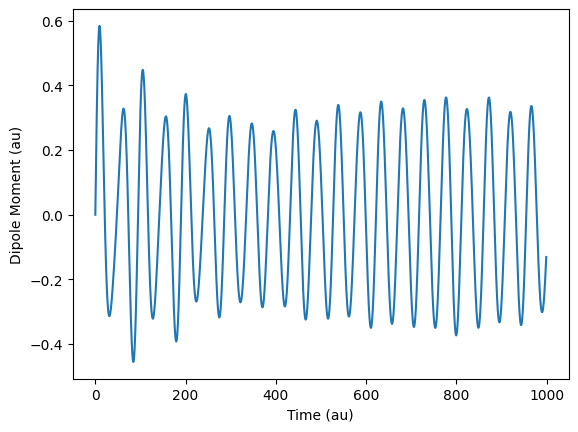

In [10]:
max_steps = len(mu)-1
t = np.linspace(0, interval * max_steps, max_steps + 1)
delta_mu = mu[:,0] - mu[0,0]
plt.plot(t, delta_mu)
plt.xlabel('Time (au)')
plt.ylabel('Dipole Moment (au)')

In [11]:
max_steps, 0.02*(as2au**2)

(24174, 3.418218299967324e-05)

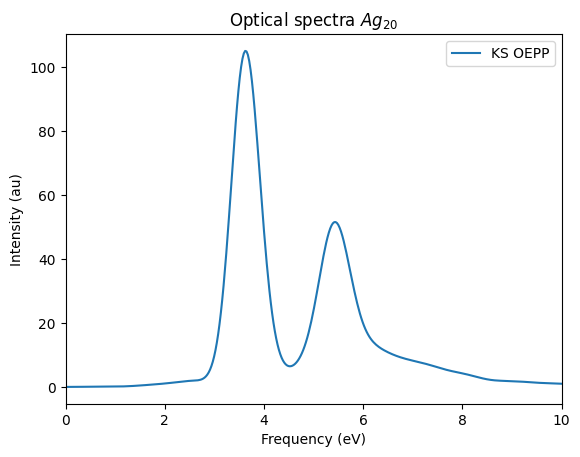

In [12]:
sigma = 0.03*(as2au**2)
omega, spectra = calc_spectra_mu(delta_mu, interval, kick=k, emax=2, sigma=sigma)
plt.plot(omega*ha, spectra, '-', label='KS OEPP')
plt.xlabel('Frequency (eV)')
plt.ylabel('Intensity (au)')
plt.xlim(0, 10)
plt.title(r'Optical spectra $Ag_{20}$')
plt.legend()